# Summary

![Customer Churn in a Bank](https://miro.medium.com/max/1400/1*47xx1oXuebvYwZeB0OutuA.png)

### `*Discover the potential of predictive analytics with this comprehensive guide to predicting customer churn in a bank. With 86% accuracy, *this notebook covers all aspects of data preprocessing, model selection and hyperparameter tuning using Randomized Search Cross Validation. Maximize your results with this cutting-edge approach to customer churn prediction*

## Importing Libraries & Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

# Data Exploration

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(f'Rows:',df.shape[0])     #Printing Rows 
print(f'Columns:',df.shape[1])  #Printing RColumns

Rows: 10000
Columns: 14


In [4]:
df.info()  #Checking data info/datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.select_dtypes(include='object') #Getting Categorical Columns

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [6]:
df.select_dtypes(include=['int64','float64']) #Getting Numerical Columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.describe() # statistical summary

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing Missing values

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Feature Enginering

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We will be dropping the first 3 columns 'RowNumber', 'CustomerId', 'Surname' as it seems usless for further use

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)  #Droped useless columns 'RowNumber', 'CustomerId', 'Surname'

In [11]:
df.select_dtypes(include='object') #checking catigorical columns 

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [12]:
print(f'Geography unique',df.Geography.unique())  #Checking uniqe values in the catigorical column
print(f'Gender unique', df.Gender.unique())      #Checking uniqe values in the catigorical column

Geography unique ['France' 'Spain' 'Germany']
Gender unique ['Female' 'Male']


In [13]:
df = pd.get_dummies(data=df, drop_first=True) # One Hot Encoding 
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


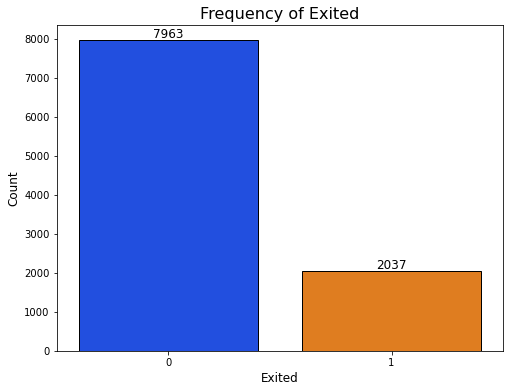

Total Values: 10000


In [14]:
#Plotting a Countplot to Explore the Label column
plt.figure(figsize=(8, 6))
sns.countplot(df['Exited'], palette='bright', edgecolor='black') 

# Adding a title and labels to the plot
plt.title('Frequency of Exited', fontsize=16)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding annotations to the bars
for i in range(len(df['Exited'].value_counts())):
    count = df['Exited'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)
    

plt.show()

#Getting the total values
print(f'Total Values:',  df.Exited.count()) 

## Corolation

In [15]:
#Creating a new variable witout he label column 'Exited'
df2 = df.drop(columns='Exited') #and droping a unwanted column
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


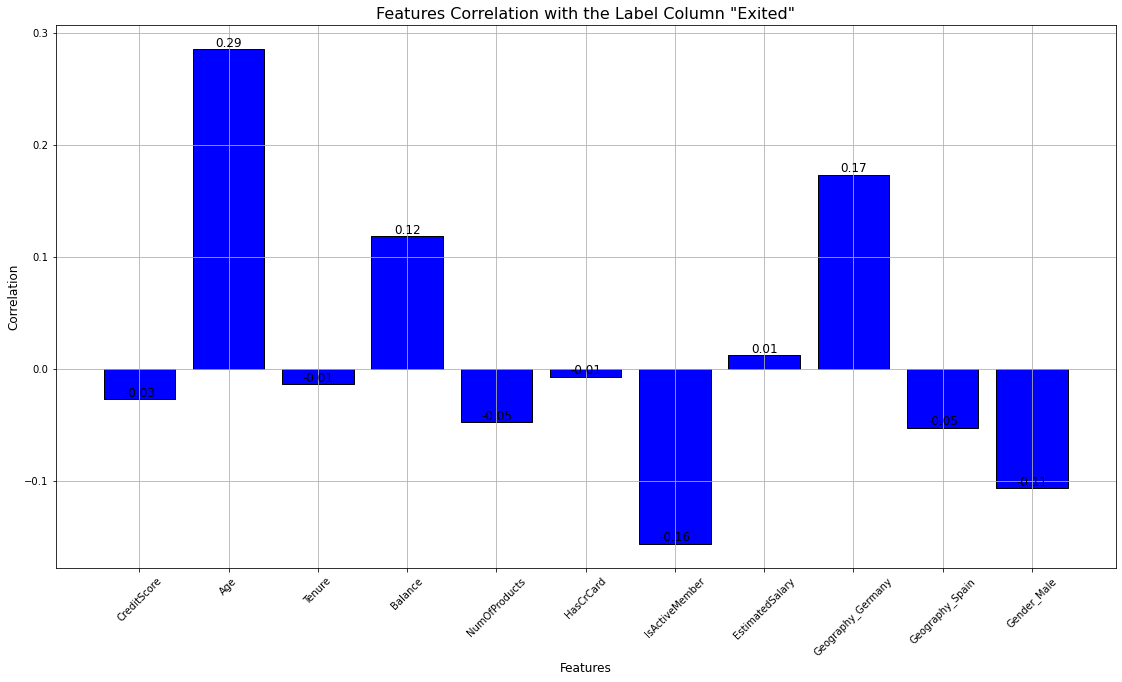

In [16]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(df['Exited'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(19, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "Exited"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

Text(507.2937500000003, 0.5, 'Features')

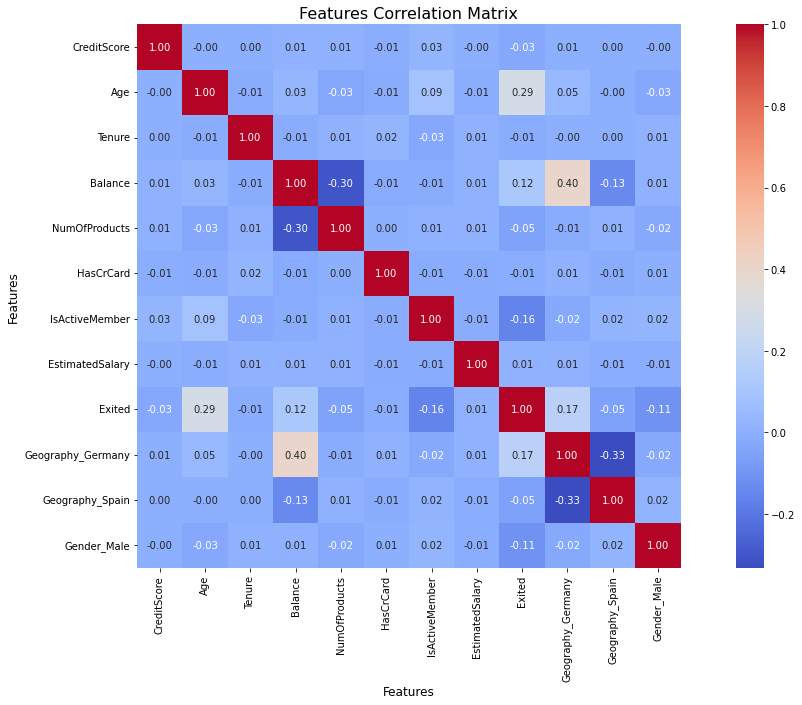

In [17]:
# Plotting a Heatmap to see in depth corrolation 
corr = df.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,10))   
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

## Splitting the dataset 

In [18]:
X = df.drop(columns='Exited')  #Droping the 'Exited' columns and giving it to X 
y = df['Exited']  #Target Feature

In [19]:
# Slittin into Train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# Checking if the data is splitted properly
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (8000, 11)
y_train (8000,)
X_test (2000, 11)
y_test (2000,)


In [21]:
# Normalizing the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Building Model 

# Logistic Regression

In [22]:
# Model Building
clf_lr = LogisticRegression(random_state=0) #Creating the Logistic Regression Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.811,0.336842,0.237037,0.581818


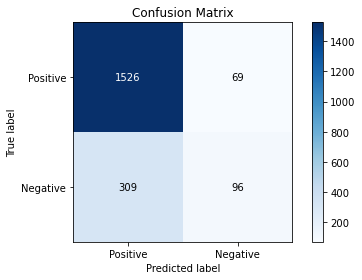

In [23]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [24]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 80.8375
Standard Deviation is: 0.8786530885395


# Random Forest

In [25]:
#Building the model 
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_rf.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.811,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.867,0.613372,0.520988,0.745583


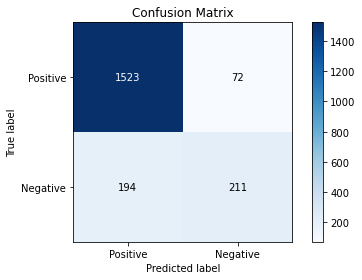

In [26]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [27]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 85.9625
Standard Deviation is: 1.0186541365939672


# GXboost

In [28]:
#Building the model 
clf_gx = XGBClassifier()      #Creating the GXboost Model
clf_gx.fit(X_train, y_train)  #Training the Model with X_train & y_train
pred = clf_gx.predict(X_test) #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_results = pd.DataFrame([['GXboost', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,GXboost,0.8545,0.599725,0.538272,0.677019


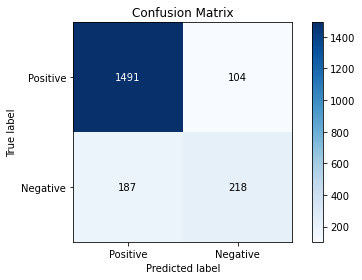

In [29]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [30]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_gx, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 85.2375
Standard Deviation is: 1.217643728682573


# Random Search to Find the best parameters for Random Forest 

In [31]:
RandomForestClassifier().get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [32]:
#Defining the Parameters 
params = {'n_estimators':[100, 130, 160, 150, 140, 120, 165, 155, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 1000],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_features': ['sqrt', 'log2', 'none', 'auto', '0.1', '0.2', '0.3', '0.4', '0.5'],
          'bootstrap': [True, False],
          'oob_score': [True, False],
          'warm_start': [True, False],
          'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
          'min_samples_split': [0.01, 0.05, 0.10, 0.25, 0.33, 0.5, 0.75, 1, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 'none'],
          'min_samples_leaf': [0.01, 0.05, 0.10, 0.25, 0.33, 0.5, 0.75, 1, 2, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 'none']}

#Tuning the randomized Search CV
rand_search = RandomizedSearchCV(estimator=clf_rf,
                                param_distributions=params,
                                n_iter=100,
                                scoring='roc_auc',
                                n_jobs=-1,
                                cv=5,
                                verbose=3)

#Training the Model
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, max_features=0.5, min_samples_leaf=90, min_samples_split=60, n_estimators=450, oob_score=False, warm_start=False;, score=nan total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=1, max_features=0.2, min_samples_leaf=0.25, min_samples_split=60, n_estimators=140, oob_score=True, warm_start=False;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=1, max_features=0.2, min_samples_leaf=0.25, min_samples_split=60, n_estimators=140, oob_score=True, warm_start=False;, score=nan total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=0.2, min_samples_leaf=6, min_samples_split=1, n_estimators=500, oob_score=False, warm_start=True;, score=nan total time=   0.3s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=18, max_features=0.2, min_samples_leaf=0.5, min_samples_split=8,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25],
                                        'max_features': ['sqrt', 'log2', 'none',
                                                         'auto', '0.1', '0.2',
                                                         '0.3', '0.4', '0.5'],
                                        'min_sam...
                                                             9, 10, 15

In [33]:
#Getting the best estimators, score & parameters
print(f'Best Est:  ',rand_search.best_estimator_)
print(f'Best Score: ',rand_search.best_score_)
print(f'Best Params: ', rand_search.best_params_)

Best Est:   RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=800, oob_score=True,
                       random_state=0, warm_start=True)
Best Score:  0.8632938771935945
Best Params:  {'warm_start': True, 'oob_score': True, 'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': True}


# Final Model

In [34]:
# Model Building
final_clf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=19,
                       min_samples_leaf=5, min_samples_split=35,
                       n_estimators=900, random_state=0, warm_start=True)
final_clf.fit(X_train, y_train)                 #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
model_results = pd.DataFrame([['Final Hypertuned Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = results.append(model_results, ignore_index=True)
#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,GXboost,0.8545,0.599725,0.538272,0.677019
3,Final Hypertuned Random Forest Classifier,0.8110,0.336842,0.237037,0.581818


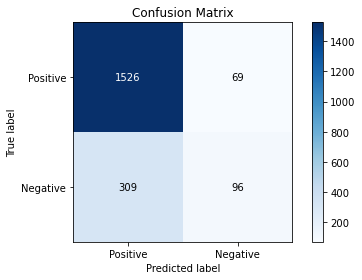

In [35]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [36]:
# Cross Validation
accuracies = cross_val_score(estimator=final_clf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuraciesa

Accuracy is: 86.39999999999999
Standard Deviation is: 0.9934158243152772


# Predicting unknown values of Patents

In [37]:
pd.options.display.max_columns = None # to see all the columns
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [38]:
unknown_customer= [[615, 45, 1, 50000.10, 2, 0, 1, 2348.88, 1, 0, 1]]

In [39]:
final_clf.predict(ss.transform(unknown_customer))

array([0])

## The END

`If you found my work to be informative and valuable, I would greatly appreciate it if you could take a moment to` **upvote** `this notebook. Your support not only motivates me to continue creating and sharing my work, but also helps it reach a wider audience. Thank you in advance for your time and consideration.`